# Analyzing Neural Time Series Data: Chapter 10

#### Converted from MATLAB to Python by Andrew J. Graves on 01/07/20

In [1]:
# Get matplotlib magic
%matplotlib notebook

# Import modules
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

### Dot products

Let $a, b \in \mathbb{R}^n$. 

- The dot product of two vectors ($a \cdot b$) is defined as:

$$a \cdot b =\sum_{i=1}^n a_{i}b_{i}$$

In [2]:
# Generate two random vectors
vec_1 = np.random.normal(size=10)
vec_2 = np.random.normal(size=10)

# Initialize zero vector to speed up iteration
elementwise_res = np.zeros(len(vec_1))

# Iterate through the vectors, multiply element-wise, and return the sum of all products
for i in np.arange(len(elementwise_res)):
    elementwise_res[i] = vec_1[i] * vec_2[i]
dot_prod1 = np.sum(elementwise_res)

# There are faster and simpler ways to compute dot products in numpy
dot_prod2 = np.sum(vec_1 * vec_2)

# This is the least error-prone and most elegant
dot_prod3 = np.dot(vec_1, vec_2)

# Each appraoch returns the same solution (at least to floating number precision), as this outputs True
np.round(dot_prod1, 10) == np.round(dot_prod2, 10) == np.round(dot_prod3, 10)

True

### Figure 10.2

#### Convolution

Let $a$ be the signal vector, $b \in \mathbb{R}^n$ the kernel vector , $k$ the timepoint at which the convolution is computed. 

- The convolution of a signal with a kernel ($a * b$) can be expressed as a dot product of the form:

$$(a * b)_{k} =\sum_{i=1}^n a_{i}b_{k - i}$$

<IPython.core.display.Javascript object>


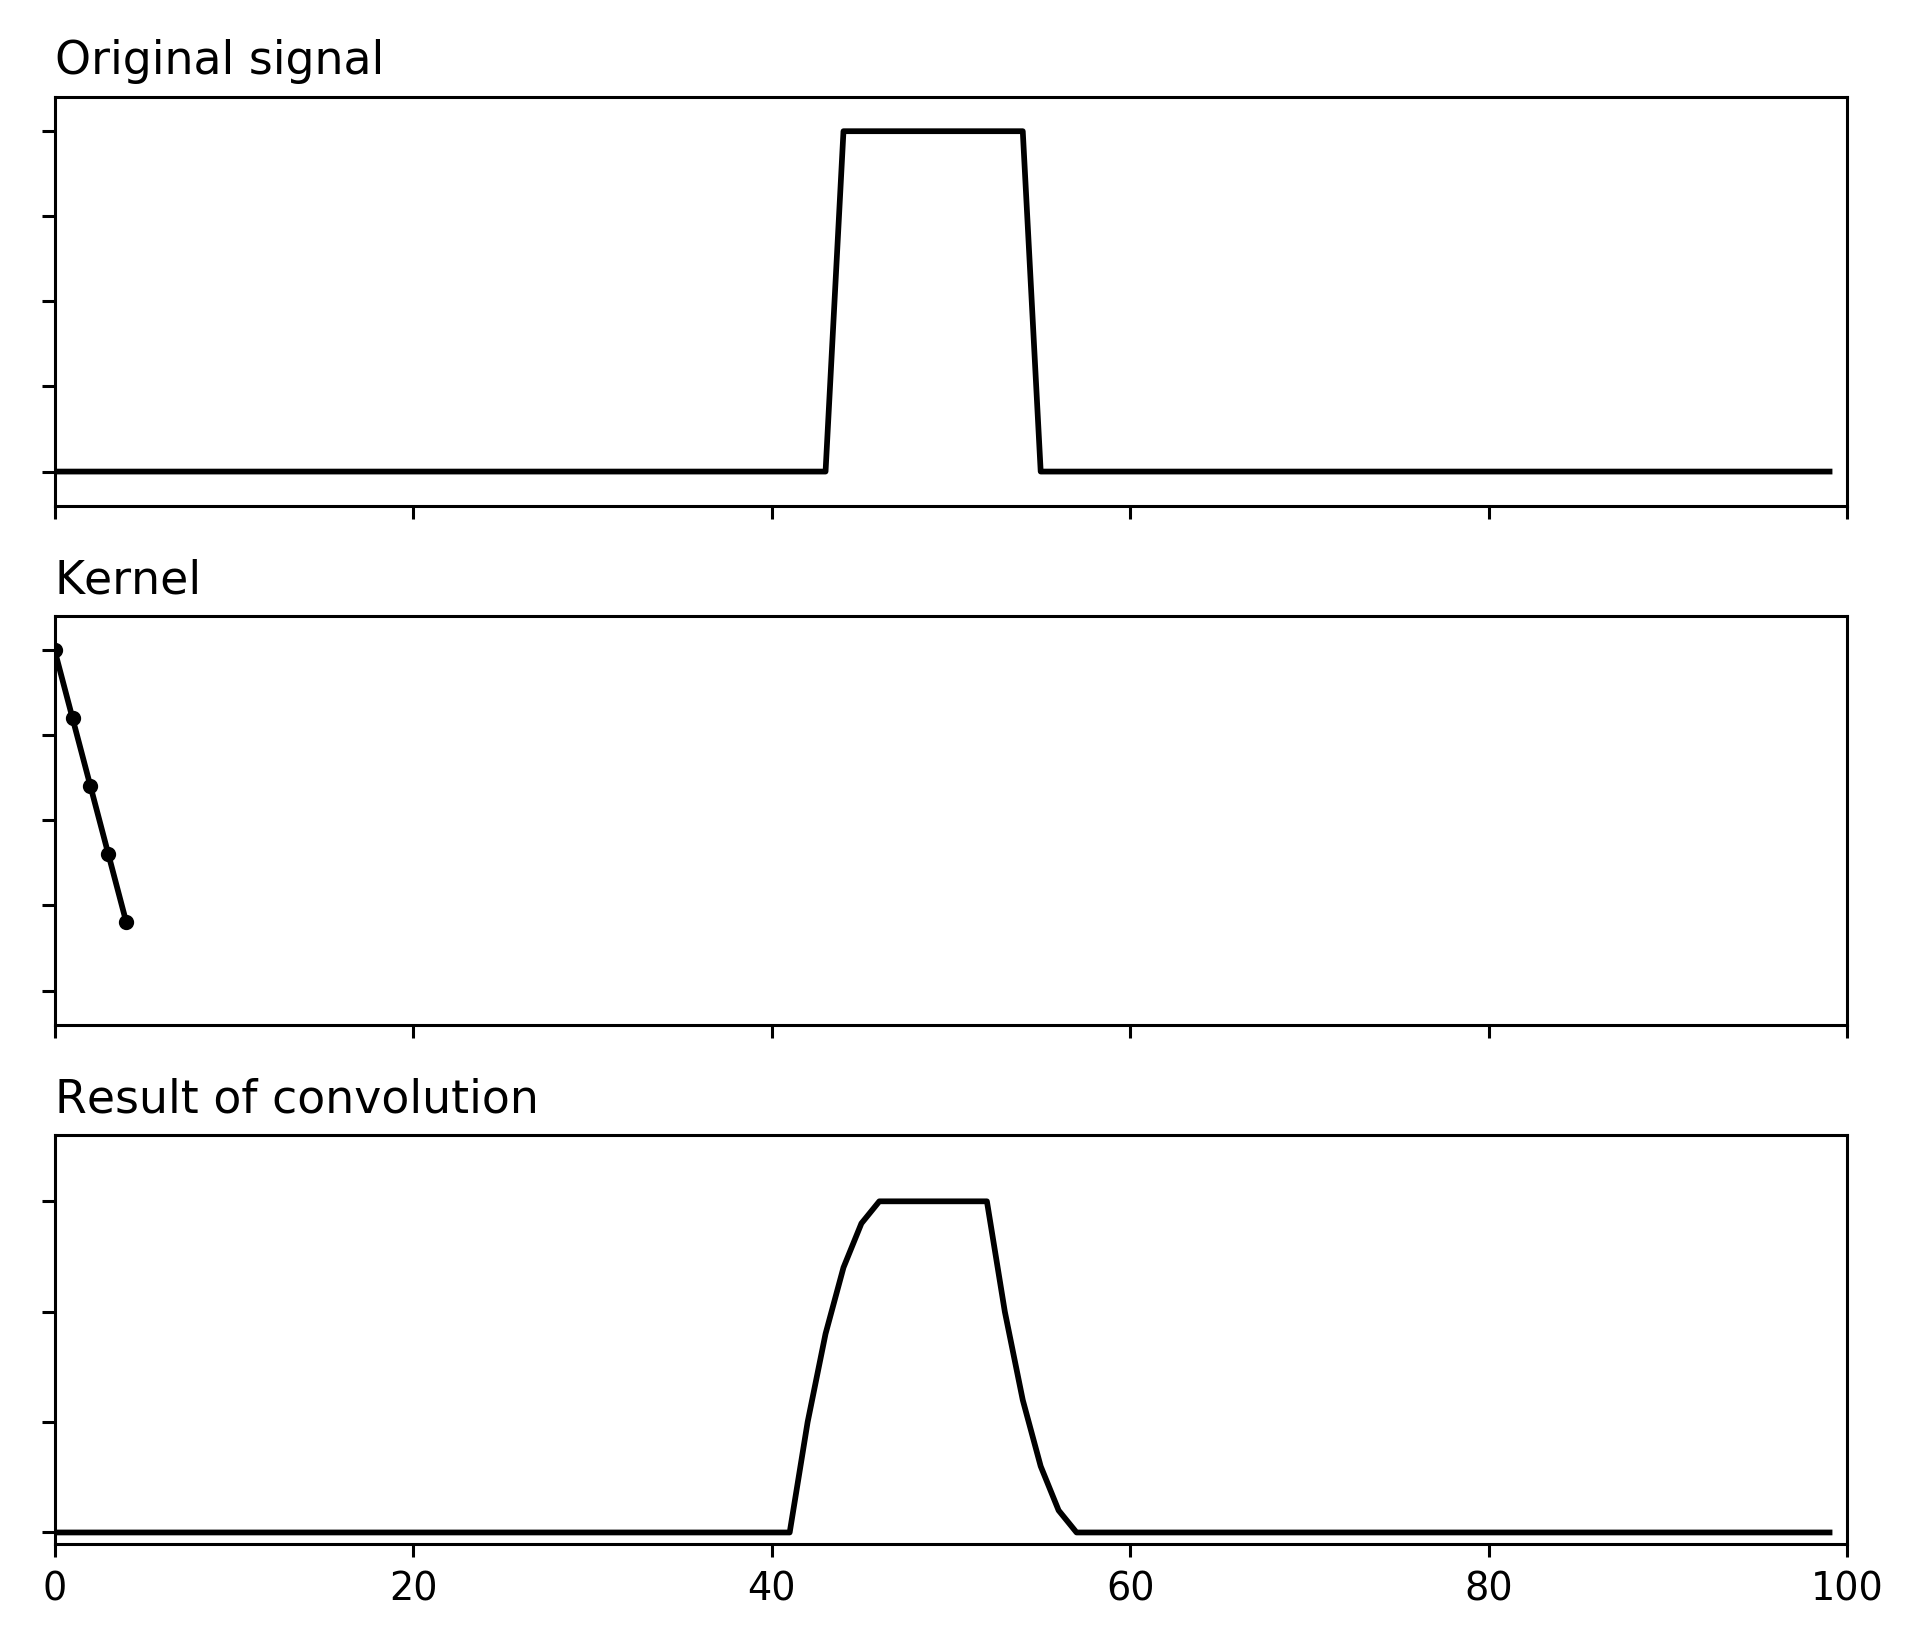

In [3]:
# Get an impulse function that contains all 0s with a 1 in the middle (stick function)
imp_fun = np.zeros(100)
mid_idx = int((len(imp_fun) / 2) - 1)
imp_fun[mid_idx] = 1

# The figure actually incorporates a box car function instead of a stick function, so we need more 1s
imp_fun[mid_idx - 5:mid_idx + 5 + 1] = 1

# Set the kernel
kernel = np.array([1, .8, .6, .4, .2])

# Convolve the impulse function with the kernel
np_conv_res = np.convolve(imp_fun, kernel, 'same')

# Figure 10.2 ----------
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(7, 6))

# Impulse function
ax[0].plot(imp_fun, color='black')
ax[0].set_ylim([-.1, 1.1])
ax[0].set_title('Original signal', loc='left')
ax[0].tick_params(labelleft=False)

# Kernel
ax[1].plot(kernel, color='black', marker='.')
ax[1].set_ylim([-.1, 1.1])
ax[1].set_title('Kernel', loc='left')
ax[1].tick_params(labelleft=False)

# Result of numpy convolution
ax[2].plot(np_conv_res, color='black')
ax[2].set_xlim([0, 100])
ax[2].set_ylim([-.1, 3.6])
ax[2].set_title('Result of convolution', loc='left')
ax[2].tick_params(labelleft=False)

fig.tight_layout()

### Figure 10.4

<IPython.core.display.Javascript object>


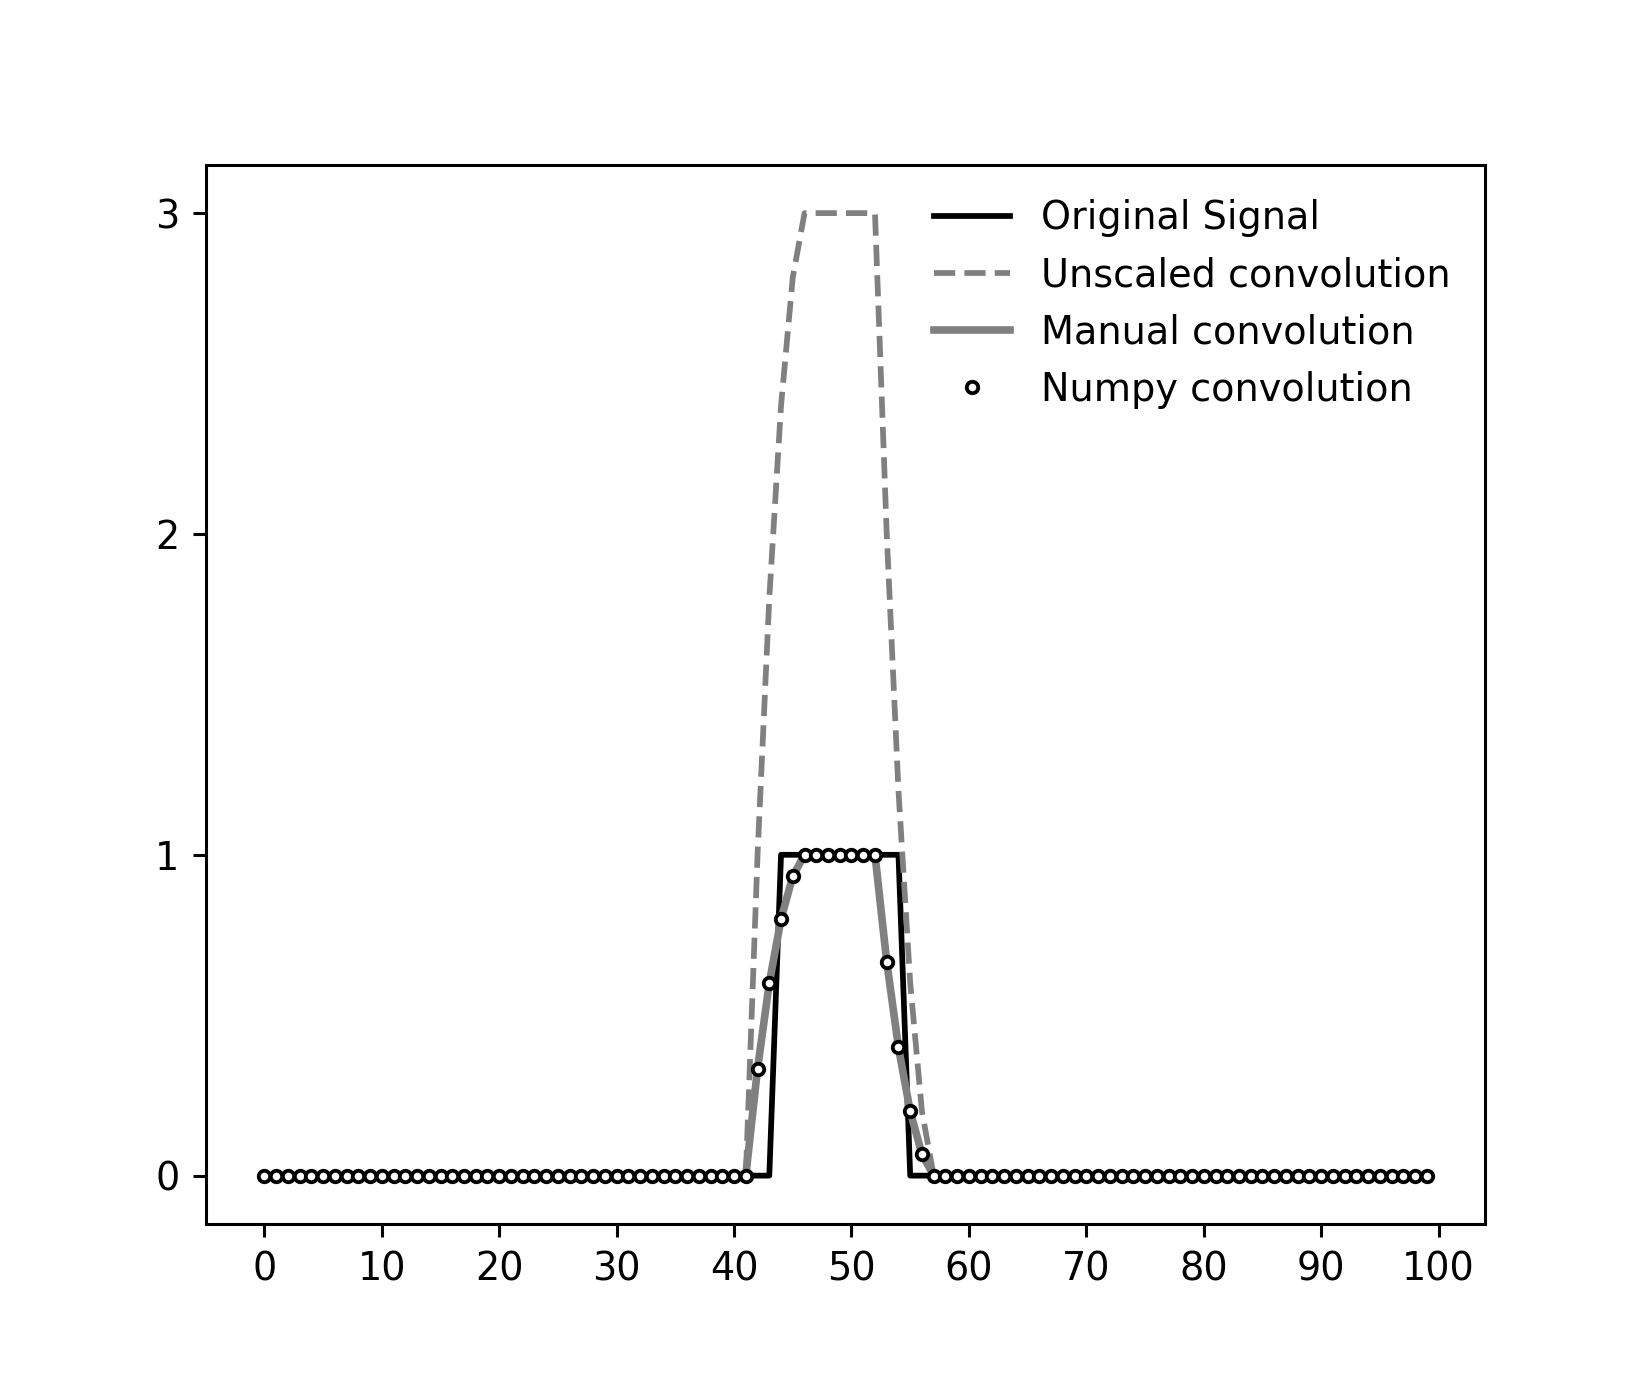

In [4]:
# We need to zero pad the impulse function for this convolution
n_pad = len(kernel) - 1
dat_for_conv = np.concatenate((np.zeros(n_pad), 
                               imp_fun,
                               np.zeros(n_pad)
                              ))

# We will slice the result of convolution with half the pad length
half_pad_len = ceil(n_pad / 2)

# Initialize zero vector to speed up iteration
padded_res = np.zeros(len(imp_fun) + n_pad)

# Run the manual convolution; np.flip reverses the elements of the vector
for i in np.arange(len(padded_res) - half_pad_len):
    padded_res[i] = np.sum(
        dat_for_conv[i:i + len(kernel)] * np.flip(kernel)
    )
    
# Slice off the padding
conv_res = padded_res[half_pad_len:len(padded_res) - half_pad_len]

# Figure 10.4 ----------

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(imp_fun, color='black')
ax.plot(conv_res, linestyle='--', color='grey')
ax.plot(conv_res / np.sum(kernel), linewidth=2, color='grey')
ax.plot(np_conv_res / np.sum(kernel), linestyle='None', 
        marker='o', markersize=3, markeredgecolor='black', markerfacecolor='white')
ax.set_yticks(np.arange(0, 4, 1))
ax.set_xticks(np.arange(0, 110, 10))
ax.legend(loc='upper right', 
          labels=('Original Signal', 'Unscaled convolution', 'Manual convolution', 'Numpy convolution'), 
          frameon=False)
plt.show()